##  Configuración del ambiente

In [2]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

import pandas as pd
import matplotlib.pyplot as plt


Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


In [ ]:
# Lee el archivo con los datos
df_ventas = pd.read_csv('reporte_ventas.csv')


## Obtención de datos

In [11]:
def obtencion_datos():

    # Declaración de variables globales
    global df_ventas, df_ventas_limpio

    # Transforma la columna 'fecha_pedido' a formato datetime
    df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')

    # Transforma la columna 'fecha_envio' a formato datetime
    df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

    # Muestra la cantidad de registros del fichero csv cargado
    print("Cantidad de registros:")
    print(df_ventas.shape)
    print('--------------')

    # Muestra los registros duplicados antes de eliminarlos
    duplicados_antes = df_ventas[df_ventas.duplicated()]
    print("Registros duplicados ANTES de eliminar:")
    print(duplicados_antes.shape)
    print('--------------')

    # Elimina registros duplicados
    df_ventas_limpio = df_ventas.drop_duplicates()
    print("Registros duplicados DESPUES de eliminar: ")
    print( df_ventas_limpio.shape)
    print('--------------')

    # Muestra filas donde nombre_cliente = 'prueba'
    df_ventas_limpio_prueba = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] == 'prueba']
    print("Muestra filas donde nombre_cliente = prueba ANTES de eliminar")
    print( df_ventas_limpio_prueba.shape)
    print('--------------')

    # Elimina filas donde nombre_cliente = 'prueba'
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']
    print("Muestra filas donde nombre_cliente = prueba DESPUES de eliminar")
    print( df_ventas_limpio.shape)
    print('--------------')

    # Registros con 'nombre_cliente' igual a nulo
    df_ventas_limpio_nulo = df_ventas[df_ventas['nombre_cliente'].isnull()]
    print("Registros con nombre_cliente nulo ANTES de eliminar")
    print(df_ventas_limpio_nulo.shape)
    print('--------------')

    # Elimina filas donde 'nombre_cliente' es nulo
    df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])
    print("Registros con nombre_cliente nulo DESPUES de eliminar ")
    print(df_ventas_limpio.shape)
    print('--------------')

    # Mostrar la cantidad de operaciones con ganancias mayores a cero antes de filtrar
    print("Mostrar la cantidad de operaciones con ganancias mayores a cero ANTES de filtrar")
    df_ventas_limpio_ganancias = df_ventas[df_ventas['total_ganancia'] > 0]
    print(df_ventas_limpio_ganancias.shape)
    print("--------------")

    # Filtra operaciones con ganancia (total_ganancia mayor a cero)
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
    print("Mostrar la cantidad de operaciones con ganancias mayores a cero DESPUES de filtrar",)
    print(df_ventas_limpio.shape)
    print('--------------')

    # Resetea el índice
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)
    print("Después de resetear el índice")
    print(df_ventas_limpio.shape)

obtencion_datos()

Cantidad de registros:
(8954, 17)
--------------
Registros duplicados ANTES de eliminar:
(15, 17)
--------------
Registros duplicados DESPUES de eliminar: 
(8939, 17)
--------------
Muestra filas donde nombre_cliente = prueba ANTES de eliminar
(4, 17)
--------------
Muestra filas donde nombre_cliente = prueba DESPUES de eliminar
(8935, 17)
--------------
Registros con nombre_cliente nulo ANTES de eliminar
(2, 17)
--------------
Registros con nombre_cliente nulo DESPUES de eliminar 
(8933, 17)
--------------
Mostrar la cantidad de operaciones con ganancias mayores a cero ANTES de filtrar
(7228, 17)
--------------
Mostrar la cantidad de operaciones con ganancias mayores a cero DESPUES de filtrar
(7210, 17)
--------------
Después de resetear el índice
(7210, 17)


## 1) ¿Cuáles son las ventas totales por año?¿Y que año tuvo mejor desempeño?

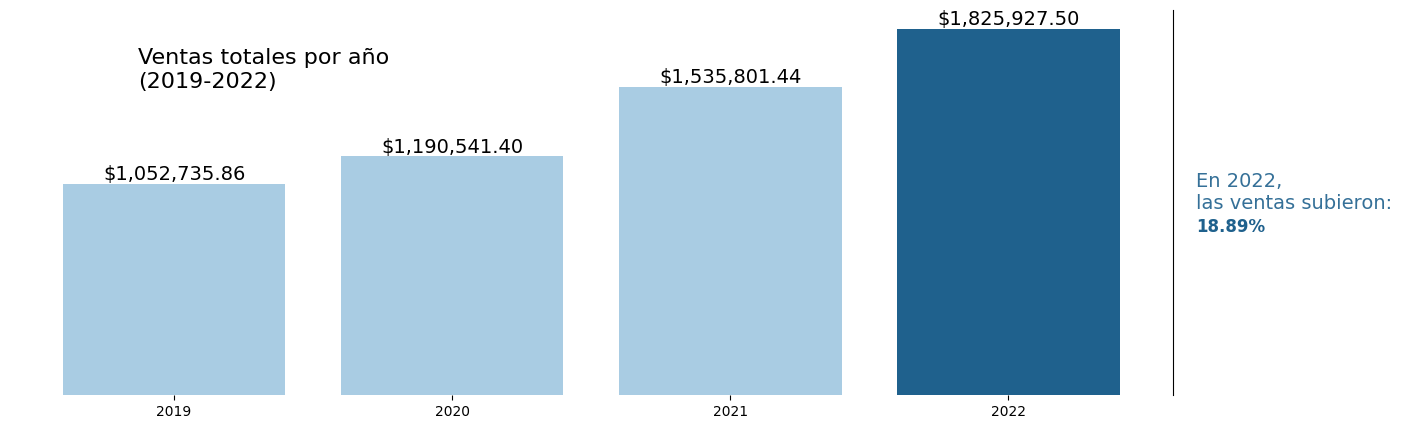

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def pregunta_1():

    global df_ventas, df_ventas_limpio, df_ventas_año

    # Crea una copia del DataFrame df_ventas_limpio
    df_ventas_año = df_ventas_limpio.copy()

    # Selecciona las columnas 'fecha_pedido' y 'total_venta'
    df_ventas_año = df_ventas_año[['fecha_pedido', 'total_venta']]

    # Agrega una nueva columna 'año' con el año de 'fecha_pedido'
    df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year

    # Elimina la columna 'fecha_pedido'
    df_ventas_año = df_ventas_año.drop('fecha_pedido', axis=1)

    # Agrupa por la columna 'año' y suma los valores de 'total_venta'
    df_ventas_año = df_ventas_año.groupby('año').agg({'total_venta': 'sum'}).reset_index()

    # Configuración de la figura y el eje
    fig, ax = plt.subplots(figsize=(15, 5))

    # Datos para el gráfico
    ejeX = df_ventas_año['año']
    ejeY = df_ventas_año['total_venta']

    # Colores para todas las barras (excepto la última)
    colores = ['#A9CCE3'] * (len(ejeX) - 1)

    # Color para la última barra
    colores.append('#1F618D')

    # Gráfico de barras verticales
    ax.bar(ejeX, ejeY, color=colores, width=0.8)

    # Añadir valores sobre cada barra
    for bar in ax.patches:
        valor = bar.get_height()
        qtd = f"${valor:,.2f}"  # Formato de dólar
        ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd, ha='center', va='bottom', fontsize=14)

    # Añadir texto en la parte superior izquierda
    ax.text(0.11, 0.8, 'Ventas totales por año\n(2019-2022)', transform=ax.transAxes, fontsize=16)

    # Añadir texto en el margen derecho
    porcentaje_aumento = ((df_ventas_año['total_venta'][df_ventas_año['año'] == 2022].values[0] -
                           df_ventas_año['total_venta'][df_ventas_año['año'] == 2021].values[0]) /
                           df_ventas_año['total_venta'][df_ventas_año['año'] == 2021].values[0]) * 100

    # Configurar el texto del margen derecho
    font_props = fm.FontProperties(weight='normal')  # Fuente normal para el texto en general
    ax.text(1.02, 0.5, f"En 2022,\nlas ventas subieron:\n ", transform=ax.transAxes, fontsize=14, va='center', color='#1F618D', alpha=0.9, fontproperties=font_props)
    ax.text(1.02, 0.438, f"{porcentaje_aumento:.2f}%", transform=ax.transAxes, fontsize=12, va='center', color='#1F618D', fontproperties={'weight': 'bold'})  # Texto del porcentaje en negrita

    # Quitar los valores de los ejes
    ax.set_xticks([])
    ax.set_yticks([])

    # Quitar el cuadro delimitador
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    # Etiquetas para los años debajo de cada barra
    ax.set_xticks(ejeX)
    ax.set_xticklabels(ejeX)

    # Añadir etiquetas en el eje x a las barras
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        label.set_y(label.get_position()[1])  # Ajuste de posición para hacer espacio entre las etiquetas

    # Mostrar el gráfico
    plt.show()


    # Mostrar el gráfico
    plt.show()

pregunta_1()

## 2)¿Cuáles son los 7 productos que mas ganancias mostraron durante todo el período?

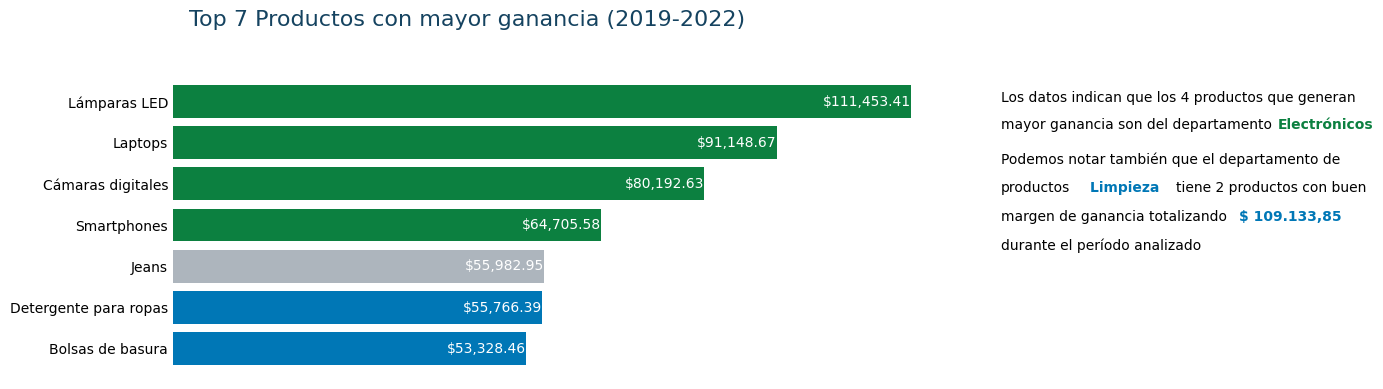

In [13]:
import matplotlib.pyplot as plt

def pregunta_2():

    global df_ventas_limpio

    # Crea una copia del DataFrame df_ventas_limpio
    df_top_ganancias = df_ventas_limpio.copy()

    # Selecciona las columnas 'tipo_producto', 'total_ganancia' y 'departamento_producto'
    df_top_ganancias = df_top_ganancias[['tipo_producto', 'total_ganancia', 'departamento_producto']]

    # Agrupa por las columnas 'tipo_producto' y 'departamento_producto', suma los valores de 'total_ganancia' y ordena en orden descendente
    df_top_ganancias = df_top_ganancias.groupby(['tipo_producto', 'departamento_producto']).agg({'total_ganancia': 'sum'})
    df_top_ganancias = df_top_ganancias.sort_values(by='total_ganancia', ascending=False)

    # Resetear los índices para tener 'tipo_producto' y 'departamento_producto' como columnas
    df_top_ganancias = df_top_ganancias.reset_index()

    # Crear una variable para almacenar el total de ganancias por departamento
    total_ganancia_por_departamento = df_top_ganancias.groupby('departamento_producto')['total_ganancia'].sum()

    # Encontrar el departamento con la mayor ganancia
    departamento_con_mayor_ganancia = total_ganancia_por_departamento.idxmax()
    ganancia_departamento_mayor = total_ganancia_por_departamento.max()

    # Seleccionar únicamente los primeros 7 registros
    df_top_ganancias = df_top_ganancias.head(7)

    # Configuración de la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))
    #fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})  # Ajustar el tamaño total de la figura

    # Datos para el gráfico
    ejeX = df_top_ganancias['total_ganancia']
    ejeY = df_top_ganancias['tipo_producto']
    colores_dict = {
        'electrónicos': '#0C8040',
        'productos de limpieza': '#0077b6',
        'ropa': '#adb5bd',
        # Agrega más colores según tus tipos de producto
    }

    # Convertir las claves del diccionario a minúsculas
    colores_dict = {key.lower(): value for key, value in colores_dict.items()}

    # Convertir los valores de 'departamento_producto' a minúsculas en el DataFrame
    df_top_ganancias['departamento_producto'] = df_top_ganancias['departamento_producto'].str.lower()

    # Asignar colores según el departamento_producto
    colores = [colores_dict[dep] for dep in df_top_ganancias['departamento_producto']]

    # Gráfico de barras horizontales
    bars = ax.barh(ejeY, ejeX, color=colores, align='center')

    # Eliminando las líneas de cuadrícula
    ax.tick_params(axis='both', which='both', length=0)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Añadir etiquetas dentro de las barras
    for i in range(len(df_top_ganancias)):
        ax.annotate(f"${df_top_ganancias['total_ganancia'].iloc[i]:,.2f}", (df_top_ganancias['total_ganancia'].iloc[i], df_top_ganancias['tipo_producto'].iloc[i]), ha='right', va='center', color='white', fontsize=10)

    ax.text(12.5e4,0,'Los datos indican que los 4 productos que generan',color='black')
    ax.text(12.5e4,0.65,'mayor ganancia son del departamento ',color='black')
    ax.text(12.58e4 + 4.1e4,0.65,'Electrónicos',color='#0C8040',weight="bold")
    ax.text(12.5e4,1.5,'Podemos notar también que el departamento de',color='black')
    ax.text(12.5e4,2.2,'productos',color='black')
    ax.text(12.75e4 + 1.1e4,2.2,'Limpieza ',color='#0077b6',weight="bold")
    ax.text(12.95e4 + 2.2e4,2.2,'tiene 2 productos con buen',color='black')
    ax.text(12.5e4 ,2.9,'margen de ganancia totalizando',color='black')
    #ax.text(12.5e4 + 3.6e4,2.5,f'$ {round(ganancia_departamento_mayor,2)}',color='black',weight="bold")
    ax.text(12.5e4 + 3.6e4,2.9,f'$ 109.133,85',color='#0077b6',weight="bold")
    ax.text(12.5e4,3.6,'durante el período analizado',color='black')

    # Configuración adicional del gráfico
    ax.set_yticks(ejeY)  # Añadir marcas en el eje Y
    ax.set_title('Top 7 Productos con mayor ganancia (2019-2022)', fontsize='16', color='#154360', y=1.12, x=0.38)
    ax.set_xticks([])  # Esto elimina los ticks del eje X

    # Invertir el eje Y para que las barras se muestren de mayor a menor ganancia
    ax.invert_yaxis()

    # Mostrar el gráfico
    plt.show()

pregunta_2()


## 3) Si separamos las ventas totales por año y por regiones , ¿Qué insight podemos obtener de las ventas?

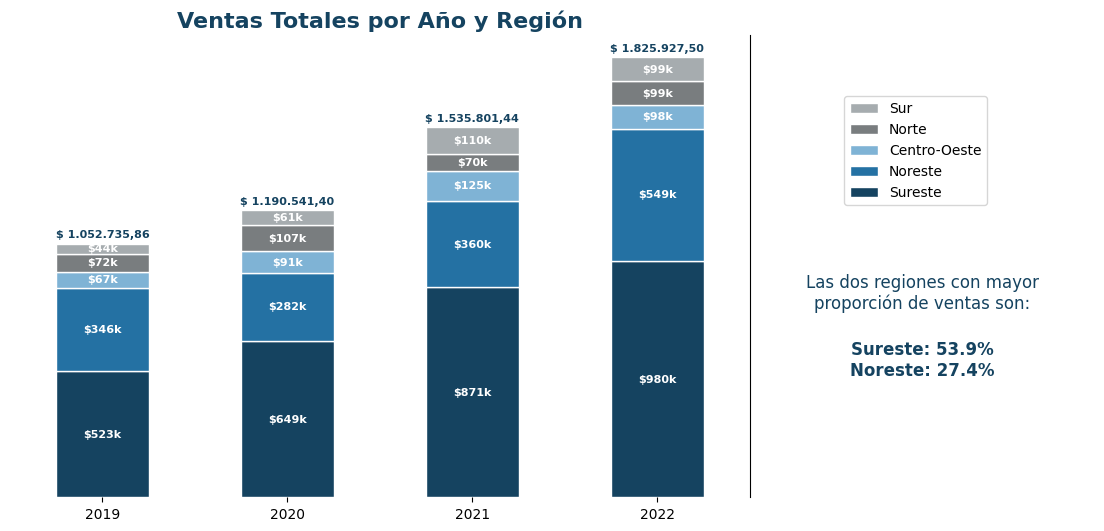

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def pregunta_3():

    # Variables globales
    global df_ventas, df_ventas_limpio, df_ventas_año

    # Extraer el año de la columna 'fecha_pedido'
    df_ventas_limpio['año'] = df_ventas_limpio['fecha_pedido'].dt.year

    # Agrupar por año y región, sumando las ventas
    df_ventas_por_año_region = df_ventas_limpio.groupby(['año', 'region']).agg({'total_venta': 'sum'}).reset_index()

    # Calcular el total de ventas por año
    total_ventas_por_año = df_ventas_por_año_region.groupby('año')['total_venta'].sum()

    # Convertir la serie a DataFrame
    df_total_ventas_por_año = total_ventas_por_año.reset_index(name='total_ventas')

    # Ordenar las regiones por ventas (de mayor a menor)
    orden_region = df_ventas_por_año_region.groupby('region')['total_venta'].sum().sort_values(ascending=False).index
    df_ventas_por_año_region['region'] = pd.Categorical(df_ventas_por_año_region['region'], categories=orden_region, ordered=True)


    # Configuración de la figura y los ejes
    fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})  # Ajustar el tamaño total de la figura

    # Definir un diccionario de colores personalizados para cada región
    colores = {
        'Sureste': '#154360',
        'Noreste': '#2471A3',
        'Centro-Oeste': '#7FB3D5',
        'Norte': '#797D7F',
        'Sur': '#A6ACAF'
        # Añadir más regiones y colores según sea necesario
    }

    # Gráfico de barras apiladas por región para cada año en el primer subplot
    stacked_bars_1 = df_ventas_por_año_region.pivot(index='año', columns='region', values='total_venta').plot(kind='bar', stacked=True, ax=axs[0], color=colores, edgecolor='white')

    # Anotar el total  de ventas por region y año en el centro de cada pila de barra en el primer subplot
    for p in stacked_bars_1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        #axs[0].annotate(f'${height:,.2f}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white', fontweight='bold')
        axs[0].annotate(f'${round(height/1000, 2):,.0f}k', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white', fontweight='bold')


    # Anotar el valor total de ventas encima de cada barra en el primer subplot
    for idx, group in df_total_ventas_por_año.groupby('año'):
        df_total_ventas_por_año = group['total_ventas'].sum()
        x_position = group.index[0]  # Obtener la posición de la primera barra en cada grupo de año
        axs[0].annotate('$ {:,.2f}'.format(df_total_ventas_por_año).replace(',', '@').replace('.', ',').replace('@', '.'),  (x_position, df_total_ventas_por_año), ha='center', va='bottom', fontsize=8, color='#154360', fontweight='bold', xytext=(0, 3), textcoords='offset points')

    # Configuración adicional del primer subplot
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title('Ventas Totales por Año y Región', ha='center', fontsize=16, color='#154360', fontweight='bold')

    # Eliminar el recuadro delimitador y los valores de los ejes x e y en el primer subplot
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(True)
    axs[0].spines['bottom'].set_visible(False)
    axs[0].spines['left'].set_visible(False)
    axs[0].set_yticks([])

    # Agregar leyenda a la derecha del primer subplot
    axs[0].legend(loc='center right', bbox_to_anchor=(1.33, 0.75), reverse=True)

    # Rotar las etiquetas del eje x en el primer subplot
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, ha='center')

    # Calcular y mostrar las regiones con mayor proporción de ventas considerando todos los años
    total_ventas_por_region = df_ventas_por_año_region.groupby('region')['total_venta'].sum()
    porcentajes_por_region = total_ventas_por_region / total_ventas_por_region.sum() * 100
    regiones_con_mayor_proporcion = porcentajes_por_region.sort_values(ascending=False).index[:2]

    # Mostrar las regiones con mayor proporción y su porcentaje en el segundo subplot
    texto_segundo_subplot = f'Las dos regiones con mayor\nproporción de ventas son:\n'
    axs[1].text(0.30, 0.42, texto_segundo_subplot, transform=axs[1].transAxes, fontsize=12, va='center', ha='center', rotation='horizontal', color='#154360')
    texto_segundo_subplot_2 = f'\n{regiones_con_mayor_proporcion[0]}: {porcentajes_por_region[regiones_con_mayor_proporcion[0]]:.1f}%\n{regiones_con_mayor_proporcion[1]}: {porcentajes_por_region[regiones_con_mayor_proporcion[1]]:.1f}%'
    axs[1].text(0.30, 0.32, texto_segundo_subplot_2, transform=axs[1].transAxes, fontsize=12, va='center', ha='center', color='#154360', rotation='horizontal', fontweight='bold')

    # Ocultar ejes y marcas en el segundo subplot
    axs[1].axis('off')

    # Mostrar la figura
    plt.show()

# Ejecutar la función
pregunta_3()


## 4) ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

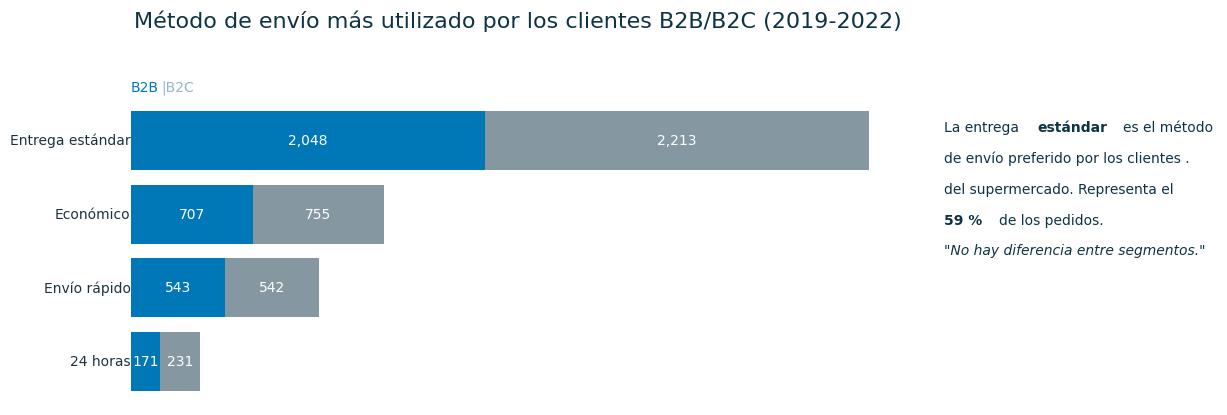

In [15]:
import matplotlib.pyplot as plt

def pregunta_4():
    global df_ventas_limpio

    # Crea una copia del DataFrame df_ventas_limpio
    df_modo_envio = df_ventas_limpio.copy()

    # Selecciona las columnas 'modo_envio', 'segmento_cliente'
    df_modo_envio = df_modo_envio[['modo_envio', 'segmento_cliente']]
    tabla_cruzada = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")


    # Guardar el resultado en df_modo_envio
    df_modo_envio = tabla_cruzada
    # Calcular el porcentaje del modo de envío más utilizado
    porcentaje_mas_utilizado = df_modo_envio.max(axis=1) / df_modo_envio.sum(axis=1) * 100
    modo_envio_mas_utilizado = porcentaje_mas_utilizado.idxmax()
    #print(f"Porcentaje del modo de envío más utilizado ({modo_envio_mas_utilizado}): {porcentaje_mas_utilizado.max():.2f}%")


    # Configuración de la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Datos para el gráfico
    ejeX = df_modo_envio.index
    eje1Y = df_modo_envio['B2B']
    eje2Y = df_modo_envio['B2C']
    colores = ['#0077b6', '#8598A1']

    # Gráfico de barras horizontales
    bars1 = ax.barh(ejeX, eje1Y, color=colores[0])
    bars2 = ax.barh(ejeX, eje2Y, left=eje1Y, color=colores[1])

    # Añadir etiquetas al centro de cada barra
    for container in ax.containers:
        labels = [f"{int(valor):,}" for valor in container.datavalues]  # Convertir a texto con formato de separador de miles
        ax.bar_label(container, label_type='center', labels=labels, color='white')

    # Añadir texto a la izquierda de cada barra
    for bar1, bar2, modo_envio in zip(bars1, bars2, ejeX):
        ax.text(bar1.get_x(), bar1.get_y() + bar1.get_height() / 2, modo_envio, ha='right', va='center', color='#1E333E')

    # Eliminar el recuadro delimitador y los valores de los ejes x e y en el primer subplot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])


    # Añadir texto B2B EN  las gráficas
    ax.text(0, 1.03, 'B2B', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0077b6')
    ax.text(0.04, 1.03,'|B2C', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#92B7C9')
    # Configuración adicional del gráfico
    ax.set_ylabel('')  # Quitar la etiqueta del eje Y
    ax.set_title('Método de envío más utilizado por los clientes B2B/B2C (2019-2022)', y=1.2, x=0.5, fontsize='16',color='#0E3345')  # Título del gráfico y desplazado hacia arriba

    # Añadir texto a la derecha de las gráficas
    ax.text(1.05, 0.90, 'La entrega ', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')
    ax.text(1.17, 0.90, 'estándar', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345',weight="bold")
    ax.text(1.28, 0.90, 'es el método ', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')
    ax.text(1.05, 0.80, 'de envío preferido por los clientes . ', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')
    ax.text(1.05, 0.70, f'del supermercado. Representa el', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')
    ax.text(1.05, 0.60, f'59 %', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345', weight="bold")
    ax.text(1.12, 0.60, f'de los pedidos.', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')
    ax.text(1.05, 0.50, '"No hay diferencia entre segmentos."', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345', fontstyle='italic')
    # Mostrar el gráfico
    plt.show()

pregunta_4()


## 5) ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?

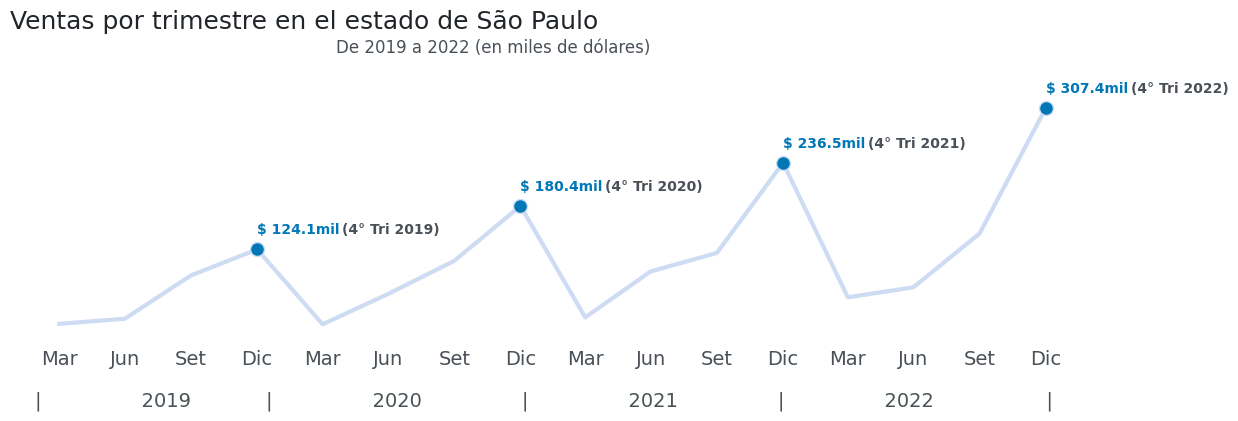

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
def pregunta_5():
  # Creando un df con los datos deseados
  df_ventas_sp = df_ventas_limpio.copy()
  df_ventas_sp = df_ventas_sp.query('estado == "São Paulo"')[["fecha_pedido", "total_venta"]]
  df_ventas_sp.set_index("fecha_pedido", inplace = True)
  df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
  df_ventas_sp["total_venta"] = round(df_ventas_sp["total_venta"] / 1e3, 2)
  df_ventas_sp = df_ventas_sp.reset_index()

  # Área del gráfico y tema de la visualización
  fig, ax = plt.subplots(figsize=(14,4))

  # Gráfico de línea
  puntos_a_marcar = [True if mes == 12 else False for mes in df_ventas_sp["fecha_pedido"].dt.month]

  ax.plot(df_ventas_sp["fecha_pedido"], df_ventas_sp["total_venta"], lw=3, color = '#CDDBF3', marker = "o",
          markersize = 10, markerfacecolor = '#0077b6', markevery = puntos_a_marcar)

  #Personalizando el gráfico
  ax.set_title('Ventas por trimestre en el estado de São Paulo', fontsize = 18, color = '#212529', loc='left')
  ax.text(0.3, 0.95, "De 2019 a 2022 (en miles de dólares)", transform=ax.transAxes, color = '#495057', fontsize = 12)

  # Eliminando las etiquetas del eje x e y
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels ([])
  ax.set_yticks([])
  ax.set_frame_on(False)
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = '#495057')

  # Eliminando las líneas de cuadrícula
  ax.tick_params(axis='both', which='both', length=0)
  ax.yaxis.grid(False)
  ax.xaxis.grid(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  # Estableciendo los límites del eje y
  plt.ylim(0, 400)

  # Definiendo el intervalo en trimestres y colocando los nombres de los meses en los labels
  ax.xaxis.set_major_locator(mdates.MonthLocator (interval=3))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
  ax.set_xticks(df_ventas_sp.fecha_pedido)
  ax.set_xticklabels (x_labels, ha="center")



  # Ajustando el eje x colocando un nivel encima de la granularidad por medio de la exposición del año
  texto = [16*" " + str(i) + 16*"" for i in range(2019, 2023)]
  ax.text(ax.get_xbound()[0] + 35, - 80, f'|{texto[0]}            |{texto[1]}                |{texto[2]}                |{texto[3]}                  |', fontsize=14, color='#495255')

  # Destacando los valores del 4º trimestre
  año = 0
  for i in range(3, len (df_ventas_sp["total_venta"]), 4):
      ax.text(x = ax.get_xticks() [i], y = df_ventas_sp["total_venta"] [i] + 20, s = f"$ {df_ventas_sp['total_venta'][i].round(1)}mil", color = '#0077b6', weight = "bold", fontsize = 10)
      ax.text(x = ax.get_xticks() [i] + 118, y = df_ventas_sp["total_venta"] [i] + 20, s = f"(4° Tri {2019 + año})", color = '#495057', weight = "bold",  fontsize = 10)
      año += 1


  return ax.get_figure()

fig = pregunta_5()



## 6) ¿Qué día de la semana se generan mas pedidos?

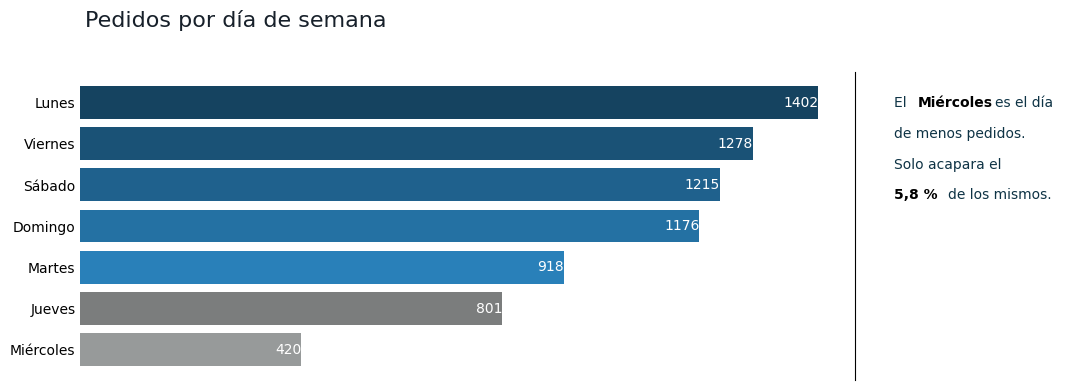

In [41]:
import calendar
import matplotlib.pyplot as plt
import pandas as pd

def dia_semana_mas_pedidos():

    global df_ventas_limpio

    # Asegurémonos de que 'fecha_pedido' esté en formato datetime
    df_ventas_limpio['fecha_pedido'] = pd.to_datetime(df_ventas_limpio['fecha_pedido'])

    # Agregar una nueva columna 'dia_semana' al DataFrame
    df_ventas_limpio['dia_semana'] = df_ventas_limpio['fecha_pedido'].dt.day_name()

    # Convertir los nombres de los días de la semana a español
    df_ventas_limpio['dia_semana'] = df_ventas_limpio['dia_semana'].map({
        'Monday': 'Lunes',
        'Tuesday': 'Martes',
        'Wednesday': 'Miércoles',
        'Thursday': 'Jueves',
        'Friday': 'Viernes',
        'Saturday': 'Sábado',
        'Sunday': 'Domingo'
    })

    # Crea una copia del DataFrame df_ventas_limpio
    df_top_pedidos = df_ventas_limpio.copy()

    # Selecciona las columnas 'dia_semana' y 'id_pedido' (o la columna que representa los pedidos)
    df_top_pedidos = df_top_pedidos[['dia_semana', 'fecha_pedido']]

    # Agrupa por el día de la semana y cuenta la cantidad de pedidos
    df_top_pedidos = df_top_pedidos.groupby('dia_semana').agg({'fecha_pedido': 'count'})
    df_top_pedidos = df_top_pedidos.sort_values(by='fecha_pedido', ascending=False)

    # Resetear los índices para tener 'dia_semana' como columna
    df_top_pedidos = df_top_pedidos.reset_index()

    # Configuración de la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Datos para el gráfico
    ejeX = df_top_pedidos['fecha_pedido']
    ejeY = df_top_pedidos['dia_semana']
    colores_dict = {
        'Lunes': '#154360',
        'Martes': '#2980B9',
        'Miércoles': '#979A9A',
        'Jueves': '#7B7D7D',
        'Viernes': '#1A5276',
        'Sábado': '#1F618D',
        'Domingo': '#2471A3'
    }

    # Convertir las claves del diccionario a minúsculas
    colores_dict = {key.lower(): value for key, value in colores_dict.items()}

    # Convertir los valores de 'dia_semana' a minúsculas en el DataFrame
    df_top_pedidos['dia_semana'] = df_top_pedidos['dia_semana'].str.lower()

    # Asignar colores según el dia_semana
    colores = [colores_dict[dia] for dia in df_top_pedidos['dia_semana']]

    # Gráfico de barras horizontales
    bars = ax.barh(ejeY, ejeX, color=colores, align='center')

    # Eliminando las líneas de cuadrícula
    ax.tick_params(axis='both', which='both', length=0)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(False)

    # Añadir etiquetas dentro de las barras
    for bar, label in zip(bars, ejeX):
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height()/2, f"{label}",
                va='center', ha='right', color='white', fontsize=10)

    # Añadir texto a la derecha de las gráficas
    ax.text(1.05, 0.90, 'El ', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')
    ax.text(1.08, 0.90, 'Miércoles', transform=ax.transAxes, rotation=0, va='center', ha='left', color='black',weight="bold")
    ax.text(1.18, 0.90, 'es el día ', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')
    ax.text(1.05, 0.80, 'de menos pedidos. ', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')
    ax.text(1.05, 0.70, f'Solo acapara el', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')
    ax.text(1.05, 0.60, f'5,8 %', transform=ax.transAxes, rotation=0, va='center', ha='left', color='black', weight="bold")
    ax.text(1.12, 0.60, f'de los mismos.', transform=ax.transAxes, rotation=0, va='center', ha='left', color='#0E3345')

    # Configuración adicional del gráfico
    ax.set_yticks(ejeY)  # Añadir marcas en el eje Y
    ax.set_title('Pedidos por día de semana', fontsize='16', color='#17202A', y=1.12, x=0.20)
    ax.set_xticks([])  # Esto elimina los ticks del eje X

    # Invertir el eje Y para que las barras se muestren de mayor a menor cantidad de pedidos
    ax.invert_yaxis()

    # Mostrar el gráfico
    plt.show()

dia_semana_mas_pedidos()
